# PROTOTYPE OF FINAL PROJECT

In [1]:
#IMPORTS

import pandas as pd
import datetime
import seaborn as sns
import requests
from sklearn.preprocessing import  StandardScaler
import os

In [2]:
#GETTING CURRENCY RATES

def currency_converter():

    APIkey = "j4YVbY4DsPe2bRdqchwWzvccCljEhg2EhlPyfrEN"
    url = f"https://api.freecurrencyapi.com/v1/latest?apikey={APIkey}"
    response = requests.get(url).json()
    df = pd.DataFrame(response['data'], index=[0])
    return df

currency_converter()

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,EUR,GBP,...,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR
0,1.491238,1.864876,5.281559,1.359075,0.94251,6.962087,23.146603,7.085729,0.95271,0.820257,...,56.03624,4.489163,4.685132,60.551375,10.40846,1.356629,35.050503,18.629891,1,17.458546


In [3]:
#GETTING FEAR GRID VALUES

def fgindex() -> pd.DataFrame:
    """returns a dataframe of fear and greed index with columns:
    [value],[value_classification],[timestamp],[time_until_update] """

    url = 'https://api.alternative.me/fng/'
    params = {'limit':100000,'date_format':'world'}
    response = requests.get(url,params).json()
    fg = pd.DataFrame(response['data'])
    return fg

fgindex()

,value,value_classification,timestamp,time_until_update
0,25,Extreme Fear,06-12-2022,-1670253958
1,26,Fear,05-12-2022,NaN
2,26,Fear,04-12-2022,NaN
3,27,Fear,03-12-2022,NaN
4,27,Fear,02-12-2022,NaN
...,...,...,...,...
1762,11,Extreme Fear,05-02-2018,NaN
1763,24,Extreme Fear,04-02-2018,NaN
1764,40,Fear,03-02-2018,NaN
1765,15,Extreme Fear,02-02-2018,NaN


In [4]:
! pip install Historic-Crypto
from Historic_Crypto import HistoricalData

  Using cached Historic_Crypto-0.1.6-py3-none-any.whl (8.8 kB)


In [5]:
#GETTING CLOSING PRICES OF CRYPTO CURRENCY

crypto = 'BTC'

def prices(crypto)-> pd.DataFrame:

    today = datetime.datetime.today().strftime('%Y-%m-%d')
    crypto_df = HistoricalData(f'{crypto}-USD',86400,'2018-01-31-00-00',f"{today}-00-00",verbose = False).retrieve_data()
    return crypto_df

prices(crypto)

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00
Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


,low,high,open,close,volume
time,,,,,
2018-02-01,8400.00,10166.25,10099.99,9014.23,38171.970034
2018-02-02,7540.00,9090.08,9014.22,8787.52,52039.268077
2018-02-03,8115.48,9499.00,8787.52,9240.00,23700.985090
2018-02-04,7859.00,9350.00,9227.80,8167.91,24062.181957
2018-02-05,6425.75,8349.16,8167.90,6905.19,59578.698221
...,...,...,...,...,...
2022-12-02,16791.02,17108.25,16980.07,17094.71,23096.436867
2022-12-03,16863.58,17158.42,17094.25,16888.53,14081.450672
2022-12-04,16882.86,17199.99,16889.17,17108.90,16961.108288


In [10]:
def data_cleaning(crypto = 'BTC'):
    '''The function returns a dataframe containing:
    price: the historical crypto price
    index: the Grid/fear index value
    '''
    #cleaning the price data

    BTC_USD = prices(crypto)
    BTC_USD= BTC_USD['close']

    #cleaning the sentiment data
    sentiment_data = fgindex()
    sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
    fg= pd.DataFrame(sentiment_data[['value', 'timestamp']])
    fg.set_index('timestamp', inplace=True)


    #merging the price and sentiment data
    df = fg.join(BTC_USD)

    #cleaning the merged dataframe
    df.dropna(inplace=True)
    df.rename(columns = {'close': 'price', 'value': 'index'}, inplace = True)

    return df

df = data_cleaning()

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00
Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/home/strrand/.pyenv/versions/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/tmp/ipykernel_4336/2608376981.py:13: UserWarning: Parsing '30-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/tmp/ipykernel_4336/2608376981.py:13: UserWarning: Parsing '29-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/tmp/ipykernel_4336/2608376981.py:13: UserWarning: Parsing '28-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['tim

In [11]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
import numpy as np

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [12]:

# Predict Closing Prices using a 10 day window of fear and greed index values and a target of the 11th day closing price
# Try a window size anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)

In [14]:
# Use 70% of the data for training and the remainder for testing

# x split
split = int(.7 * len(X))
X_train = X[:split - 1]
X_test = X[split:]

# y split
y_train = y[:split - 1]
y_test = y[split:]

In [29]:
df.dtypes

index     object
price    float64
dtype: object

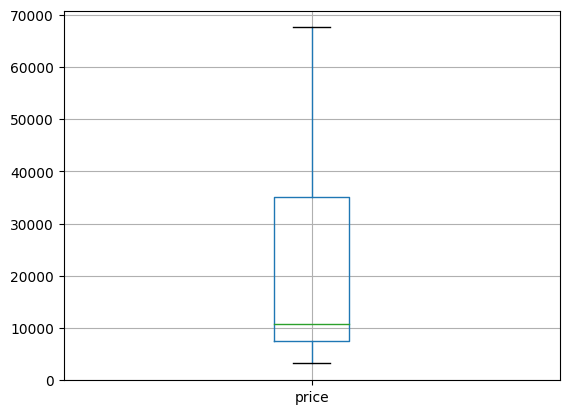

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

boxplot = df.boxplot(column=['price'])


In [31]:
# Use MinMaxScaler to scale the data between 0 and 1
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [32]:
X_train.shape

(1217, 10)

In [33]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [34]:
X_train.shape

(1217, 10, 1)

From Challenge `predict temperature` 

![image.png](attachment:image.png)

In [ ]:
histogram = df.hist(column=['price'])
plt.show()

 ## Formulas to export to preprocess.py

In [ ]:
def window_data(crypto='BTC',window=10):
    """returns two arrays:
    X : Array of lists. Each list contains n_window observations of features.
    y: Array of lists. Each list contains the price of obs n_window + 1
    """
    df = data_cleaning(crypto)
    feature_column = df.columns.get_loc('index')
    target_column = df.columns.get_loc('price')
    X = []
    y = []

    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_column]
        target = df.iloc[(i + window), target_column]
        X.append(features)
        y.append(target)

    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
window_data()

In [ ]:
def folds(crypto='BTC',window=10):
    """ returns four arrays:
    X_train : array of lists with the 70% of the observed feature values
    X_test : array of lists with the 30% of the observed feature values
    y_train : array of lists with the 70% of the observed target values
    y_test : array of lists with the 30% of the observed target values
    """

    X, y = window_data(crypto,window)
    split = int(.7 * len(X))
    X_train = X[:split - 1]
    X_test = X[split:]

    # y split
    y_train = y[:split - 1]
    y_test = y[split:]

    return X_train,X_test,y_train,y_test

In [ ]:
folds()

In [ ]:
def scaling(crypto='BTC',window=10):
    """ returns four arrays:
    X_train_scaled : array of lists with the 70% of the observed feature values scaled,
    X_test_scaled : array of lists with the 30% of the observed feature values scaled,
    y_train_scaled : array of lists with the 70% of the observed target values scaled,
    y_test_scaled : array of lists with the 30% of the observed target values scaled.
    """

    scaler = StandardScaler()
    X_train,X_test,y_train,y_test = folds(crypto,window)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    y_train_scaled = scaler.fit_transform(y_train)
    y_test_scaled = scaler.transform(y_test)

    return X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled

In [ ]:
scaling()

In [ ]:
def reshape(crypto='BTC',window=10):
    X_train_scaled,X_test_scaled = scaling(crypto,window)[0],scaling(crypto,window)[1]
    X_train = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
    return X_train,X_test

In [ ]:
X_train,X_test = reshape()